<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.04/bds_algoritmos_006_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20Scikit-learn.png?raw=true">
</p>

 # **<font color="DeepPink">Modelos supervisados: √Årbol de Decisi√≥n para Regresi√≥n con `scikit_learn`</font>**


<p align="justify">
En este cuaderno, presentamos c√≥mo funcionan los <b>√°rboles de decisi√≥n en problemas de regresi√≥n</b>.
<br>
<br>
Los √°rboles de decisi√≥n en regresi√≥n son una t√©cnica utilizada en el aprendizaje autom√°tico (machine learning) para realizar predicciones num√©ricas.
<br>
<br>
A diferencia de los √°rboles de decisi√≥n en clasificaci√≥n, que se utilizan para predecir clases o categor√≠as discretas, <mark>los √°rboles de decisi√≥n en regresi√≥n se emplean para predecir valores continuos</mark>.



<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Arbol-003.png?raw=true" width="450">
</p>

<p align="justify">
Un √°rbol de decisi√≥n en regresi√≥n es una estructura de √°rbol donde cada nodo interno representa una prueba o condici√≥n sobre una variable explicativa del conjunto de datos. Los nodos hoja o terminales del √°rbol contienen las predicciones num√©ricas. Cada vez que se realiza una prueba en un nodo interno, se sigue uno de los caminos a trav√©s de las ramas del √°rbol hasta llegar a una hoja, que proporciona la predicci√≥n.
<br>
<br>
La construcci√≥n de un √°rbol de decisi√≥n implica dividir sucesivamente el conjunto de datos en subconjuntos m√°s peque√±os generando regiones no solapadas: $R_1, R_2,R_3,...,R_j$, para luego realizar la predicci√≥n de la variable respuesta en cada regi√≥n. Es necesario establecer una metodolog√≠a que permita crear las regiones, o lo que es equivalente, decidir donde se introducen las divisiones (umbrales): en que variables explicativas o predictoras y en que valores de las mismos. Es en este punto donde se diferencian lo algoritmos de √°rboles de regresi√≥n y clasificaci√≥n.
<br>
<br>
En los √°rboles de regresi√≥n, la forma para identificar las divisiones es utilizando el <b>m√©todo de m√≠nimos cuadrados</b>. El objetivo es encontrar las  $j$ regiones $(R_1 ,...,  R_j)$ que minimizan la suma de los errores o residuos al cuadrado totales:
<br>
<br>
$$min\sum_{j=1}^J  \displaystyle\sum_{i \in R_j}(y_i -\hat{y}_{R_j})^2$$
<br>
donde  $\hat{y}_{R_j}$ es la media de la variable respuesta en la regi√≥n  $R_j$
<br>
<br>
En resumen, se busca una distribuci√≥n de regiones tal que, la sumatoria de los errores al cuadrado entre las observaciones (valores reales) y la media de la regi√≥n (valor pronosticado) a la que pertenecen sea lo menor posible. Es decir, que los valores pronosticados sean lo m√°s cercanos posible a los valores reales.

<p align="justify">
Una vez construido el √°rbol, se puede utilizar para realizar predicciones sobre nuevos datos. Para ello, se sigue el camino a trav√©s del √°rbol seg√∫n las condiciones de las pruebas en cada nodo, hasta llegar a una hoja que proporciona la predicci√≥n num√©rica.

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Arbol-004.png?raw=true" width="400">
</p>

<p align="justify">
Los √°rboles de decisi√≥n en regresi√≥n son ampliamente utilizados debido a su simplicidad interpretativa y su capacidad para modelar relaciones no lineales. Sin embargo, tambi√©n pueden ser propensos a sobreajuste si no se controla adecuadamente, lo que puede resultar en un mal rendimiento en datos nuevos.
<br>
<br>
Para mitigar este problema, se pueden aplicar t√©cnicas como la poda del √°rbol, la limitaci√≥n de la profundidad m√°xima o el uso de m√∫ltiples √°rboles en conjunto (<code>ensamble</code>) para mejorar la precisi√≥n y la generalizaci√≥n del modelo.

## **<font color="DeepPink">Bibliotecas**

In [1]:
# Operaciones matem√°ticas y estad√≠sticas
import pandas as pd
import numpy as np

In [2]:
# Visualizaci√≥n
import plotly.express as px
import plotly.graph_objs as go

## **<font color="DeepPink">Conjunto de Datos**

<p align="justify">
Primero, cargamos el conjunto de datos de la empresa de comercio electr√≥nico espec√≠ficamente para resolver un problema de regresi√≥n.

In [10]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/main/datasets/Ecommerce_Customers.csv"

In [11]:
datos = pd.read_csv(url)

In [12]:
datos.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

<p align="justify">
Es una empresa de comercio electr√≥nico con sede en la ciudad de Nueva York que vende ropa en l√≠nea, pero tambi√©n tienen sesiones de asesoramiento sobre estilo y ropa en la tienda. Los clientes que vienen a la tienda, tienen sesiones/reuniones con un estilista personal, luego pueden ordenar a trav√©s de una aplicaci√≥n m√≥vil o sitio web la ropa que desean.
<br>
<br>
Intentan identificar si debe enfocarse en mejorar su experiencia de aplicaci√≥n movil o en su p√°gina web.
<br>
<br>
Este es un conjunto de datos de los clientes de la empresa. El cual tiene informaci√≥n del cliente, como correo electr√≥nico, direcci√≥n postal y su color de avatar.
<br>
<br>
Tambi√©n tiene columnas de valores num√©ricos:

* **Avg. Session Length**: duraci√≥n promedio de sesiones de asesoramiento de estilo en la tienda.

* **Time on App**: tiempo promedio de permanencia en la aplicaci√≥n en minutos.

* **Time on Website**: tiempo promedio de permanencia en el sitio web en minutos.

* **Length of Membership**: cu√°ntos a√±os ha sido miembro el cliente.

* **Yearly Amount Spent**: monto anual gastado en la plataforma.





In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Descartamos las columnas que no son √∫ltiles con el m√©todo `drop()`.

In [14]:
datos= datos.drop(["Avatar","Email","Address"],axis=1)

Renombramos las columnas con el m√©todo `rename()`.

In [15]:
datos.rename(columns={"Avg. Session Length": "Tiempo_sesi√≥n",
                      "Time on App":"Tiempo_app",
                      "Time on Website":"Tiempo_web",
                      "Length of Membership":"A√±os_miembro",
                      "Yearly Amount Spent":"Gasto_anual"},
             inplace=True)

In [16]:
datos.head()

Tiempo_sesi√≥n  Tiempo_app  Tiempo_web  A√±os_miembro  Gasto_anual
0      34.497268   12.655651   39.577668      4.082621   587.951054
1      31.926272   11.109461   37.268959      2.664034   392.204933
2      33.000915   11.330278   37.110597      4.104543   487.547505
3      34.305557   13.717514   36.721283      3.120179   581.852344
4      33.330673   12.795189   37.536653      4.446308   599.406092

 ## **<font color="DeepPink">Divisi√≥n del conjunto de datos</font>**

In [17]:
#X = datos[["Tiempo_sesi√≥n","Tiempo_app","Tiempo_web","A√±os_miembro"]]
X = datos[["Tiempo_app"]]
y = datos["Gasto_anual"]

<p align="justify">
üëÄ Divisi√≥n del conjunto de entrenamiento y prueba.
</p>


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=123)

In [19]:
X_train.shape

(375, 1)

In [20]:
X_test.shape

(125, 1)

In [21]:
y_train.shape

(375,)

In [22]:
y_test.shape

(125,)

## **<font color="DeepPink">An√°lisis Gr√°fico**

Primero ilustraremos la diferencia entre un modelo de **regresi√≥n lineal** y un **√°rbol de decisi√≥n**.

In [23]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
prediction = linear_model.predict(X_test)
prediction[:10]

array([458.15883227, 516.76734685, 549.21488828, 459.45937468,
       490.25668002, 515.29865179, 499.5390656 , 534.28507942,
       458.22973591, 492.59436231])

In [24]:
linear_model.score(X_test, y_test)

0.22400695636628387

In [25]:
fig = go.Figure([go.Scatter(x = X_test.Tiempo_app,
                            y = y_test,
                            mode = "markers",
                            showlegend = False,
                            name = "Real"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction,
                            name = "Regresi√≥n Lineal")
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Gasto Anual",
                  xaxis_title = "Tiempo en la app")

fig.show()

<p align="justify">
En el gr√°fico anterior, vemos que una regresi√≥n lineal puede ajustar estos datos. Una caracter√≠stica de este modelo es que todas las nuevas predicciones estar√°n en la l√≠nea.

In [26]:
fig = go.Figure([go.Scatter(x = X_test.Tiempo_app,
                            y = y_test,
                            mode = "markers",
                            showlegend = False,
                            name = "Real"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction,
                            name = "Regresi√≥n Lineal"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction,
                            mode = "markers",
                            marker=dict(size=8),
                            name = "Predicci√≥n")
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Gasto Anual",
                  xaxis_title = "Tiempo en la app")

fig.show()

<p align="justify">
En contraste con los modelos lineales, los √°rboles de decisi√≥n se caracterizan por ser <b>modelos no param√©tricos</b>, lo cual implica que no representan la relaci√≥n entre las variables mediante una funci√≥n matem√°tica predefinida.
<br>
<br>
A continuaci√≥n, se contrasta el √°rbol de decisi√≥n para regresi√≥n con el modelo lineal anteriormente planteado.

## **<font color="DeepPink">Creaci√≥n del modelo**

Documentaci√≥n [√Årbol de Decisi√≥n para Regresi√≥n](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


<p align="justify">
En este ejemplo, se crea un de √°rbol de decisi√≥n para regresi√≥n mediante la clase <code>DecisionTreeRegressor()</code> de <code>scikit_learn</code>. Luego, se ajusta el modelo a los datos de entrenamiento utilizando el m√©todo <code>fit()</code>, donde <code>X_train</code> representa la variabre predictora de entrenamiento e <code>y_train</code> es la variable objetivo de entrenamiento. Una vez ajustado el modelo, se pueden realizar predicciones en los datos de prueba utilizando el m√©todo <code>predict()</code>.
<br>
<br>
Cuando se utiliza <code>max_depth=1</code>, se crea un √°rbol de decisi√≥n con solo un nivel de profundidad. Esto significa que el √°rbol solo tiene un nodo ra√≠z y dos nodos hoja o terminales.

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)
prediction[:10]

array([477.18445196, 545.80850726, 545.80850726, 477.18445196,
       477.18445196, 545.80850726, 477.18445196, 545.80850726,
       477.18445196, 477.18445196])

In [28]:
tree.score(X_test, y_test)

0.13047400216848126

Profundidad del √°rbol: 1
N√∫mero de nodos terminales: 2


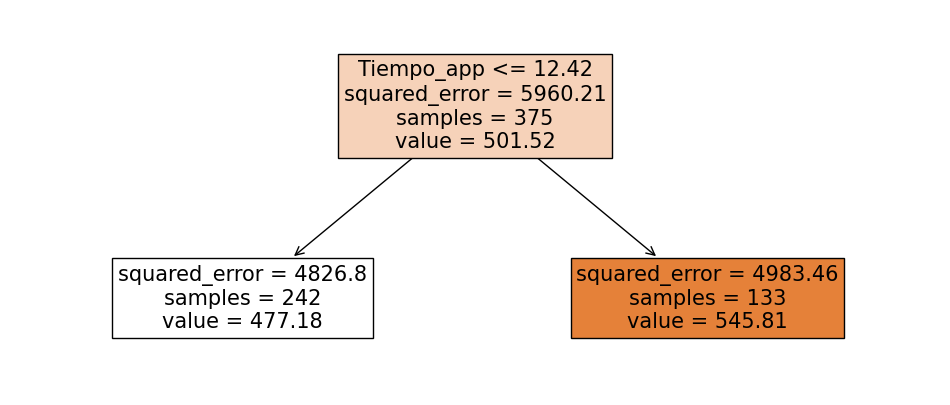

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del √°rbol: {tree.get_depth()}")
print(f"N√∫mero de nodos terminales: {tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree,
            feature_names = X.columns,
            filled        = True,
            impurity      = True,
            fontsize      = 15,
            precision     = 2,
            ax            = ax
       )

In [31]:
fig = go.Figure([go.Scatter(x = X_test.Tiempo_app,
                            y = y_test,
                            mode = "markers",
                            showlegend = False,
                            name = "Real"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction,
                            mode='markers',
                            marker=dict(size=8),
                            name = "√Årbol de decisi√≥n")
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Gasto Anual",
                  xaxis_title = "Tiempo en la app")

fig.show()

<p align="justify">
El umbral para <code>Tiempo_app</code> es de 12.42 minutos. Los valores pronosticados a cada lado de la divisi√≥n son dos constantes: 477.18 y 545.81 d√≥lares. Estos valores corresponden a los valores medios de las muestras de entrenamiento en cada regi√≥n.


<p align="justify">
 El par√°metro <code>max_depth</code> del algoritmo <code>DecisionTreeRegressor</code> especifica la profundidad m√°xima permitida para el √°rbol. La profundidad de un √°rbol de decisi√≥n se refiere a la longitud del camino m√°s largo desde la ra√≠z hasta una hoja (nodo terminal). Un valor m√°s bajo restringir√° la profundidad del √°rbol, lo que puede llevar a modelos m√°s simples y menos propensos al sobreajuste. Por otro lado, un valor m√°s alto permitir√° √°rboles m√°s profundos y complejos, lo que podr√≠a resultar en modelos m√°s precisos pero tambi√©n m√°s propensos al sobreajuste.
<br>
<br>
 Es importante tener en cuenta que la elecci√≥n √≥ptima de <code>max_depth</code> depende del conjunto de datos y del problema espec√≠fico. En general, se recomienda ajustar este par√°metro mediante t√©cnicas de validaci√≥n cruzada u optimizaci√≥n de hiperpar√°metros para encontrar el equilibrio adecuado entre la complejidad y la capacidad de generalizaci√≥n del modelo.
<br>
<br>
Comprobemos el efecto de aumentar la profundidad:

In [33]:
tree_2 = DecisionTreeRegressor(max_depth=3)
tree_2.fit(X_train, y_train)
prediction_2 = tree_2.predict(X_test)
prediction_2[:10]

array([452.23967485, 519.23995554, 540.25357874, 452.23967485,
       479.35999582, 519.23995554, 502.77785539, 540.25357874,
       452.23967485, 479.35999582])

In [34]:
tree_2.score(X_test, y_test)

0.1760806420864538

Profundidad del √°rbol: 3
N√∫mero de nodos terminales: 8


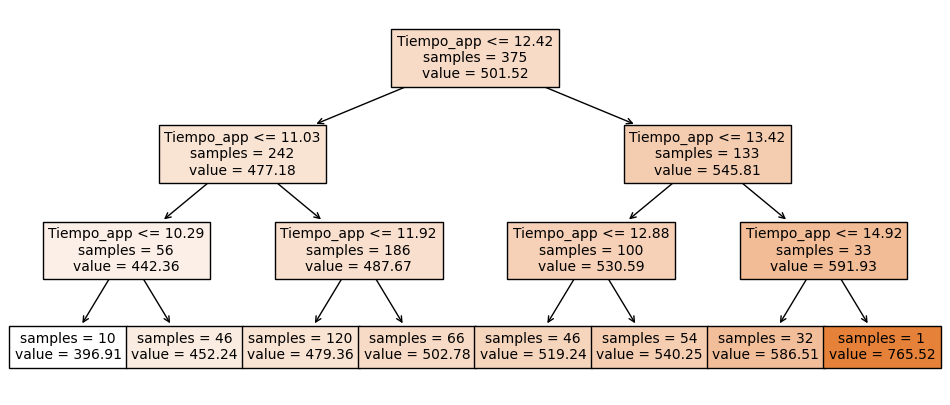

In [40]:
fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del √°rbol: {tree_2.get_depth()}")
print(f"N√∫mero de nodos terminales: {tree_2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_2,
            feature_names = X.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [39]:
fig = go.Figure([go.Scatter(x = X_test.Tiempo_app,
                            y = y_test,
                            mode = "markers",
                            showlegend = False,
                            name = "Real"),
                 go.Scatter(x = X_test.Tiempo_app,
                            y = prediction_2,
                            mode='markers',
                            marker=dict(size=8),
                            name = "√Årbol de decisi√≥n")
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Gasto Anual",
                  xaxis_title = "Tiempo en la app")

fig.show()

<p align="justify">
Aumentar la profundidad del √°rbol aumentar√° el n√∫mero de regiones y, por lo tanto, el n√∫mero de valores constantes que el √°rbol es capaz de predecir (nodos terminales).

<p align="justify">
Los par√°metros <code>min_sample_leaf</code> y <code>min_samples_split</code> del algoritmo <code>DecisionTreeRegressor</code> permiten controlar la complejidad del √°rbol de decisi√≥n y evitar divisiones que puedan conducir a nodos con muy pocas muestras, lo que podr√≠a resultar en un sobreajuste. Al aumentar estos valores, se obtendr√° un √°rbol de decisi√≥n m√°s generalizado y menos complejo.


- `min_samples_leaf` especifica el n√∫mero m√≠nimo de muestras requeridas para que un nodo sea considerado una hoja (nodo terminal) en el √°rbol de decisi√≥n. Si el n√∫mero de muestras en un nodo es menor que `min_samples_leaf`, no se realizar√° una divisi√≥n en ese nodo y se convertir√° en una hoja. Este par√°metro ayuda a evitar divisiones que produzcan hojas con muy pocas muestras, lo que puede ser √∫til para evitar sobreajuste. Garantiza un n√∫mero m√≠nimo de muestras en una hoja terminal.

- `min_samples_split` especifica el n√∫mero m√≠nimo de muestras requeridas para que se realice una divisi√≥n en un nodo. Si el n√∫mero de muestras en un nodo es menor que `min_samples_split`, no se realizar√° ninguna divisi√≥n en ese nodo, y se convertir√° en una hoja. Este par√°metro controla la cantidad m√≠nima de muestras necesarias para que un nodo sea elegible para realizar una divisi√≥n.

<br>
<p align="justify">
Comprobemos el efecto de incorporar el par√°metro <code>min_samples_leaf</code>:

In [41]:
tree_3 = DecisionTreeRegressor(min_samples_leaf=40)
tree_3.fit(X_train, y_train)
prediction_3 = tree_3.predict(X_test)
prediction_2[:10]

array([452.23967485, 519.23995554, 540.25357874, 452.23967485,
       479.35999582, 519.23995554, 502.77785539, 540.25357874,
       452.23967485, 479.35999582])

In [42]:
tree_3.score(X_test, y_test)

0.17996819057804647

Profundidad del √°rbol: 4
N√∫mero de nodos terminales: 7


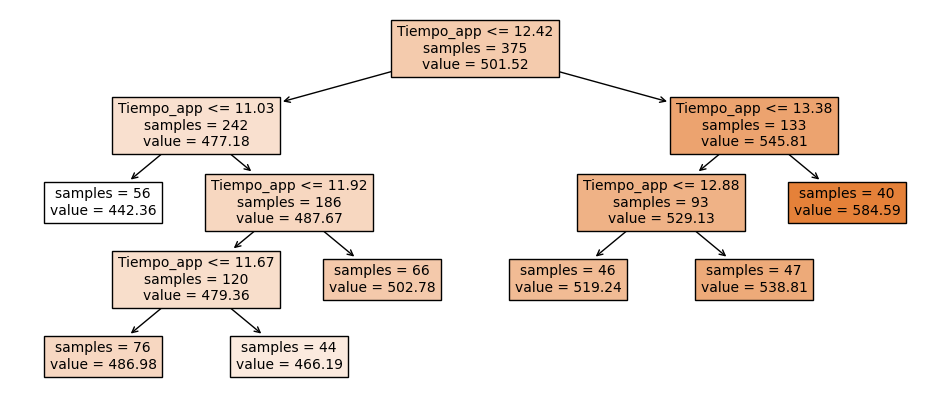

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del √°rbol: {tree_3.get_depth()}")
print(f"N√∫mero de nodos terminales: {tree_3.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_3,
            feature_names = X.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

 # **<font color="DeepPink">Conclusiones</font>**

<p align="justify">
üëÄ En este colab nosotros:
<br><br>
‚úÖ Utilizamos la biblioteca <code>scikit_learn</code> para entrenar un modelo de √°rbol de decisi√≥n en el contexto de un problema de regresi√≥n.
<br>
‚úÖ Realizamos un an√°lisis del comportamiento del √°rbol de decisi√≥n a trav√©s de la generaci√≥n de un gr√°fico denominado <code>plot_tee</code>.



<br>
<br>
<p align="center"><b>
üíó
<font color="DeepPink">
Hemos llegado al final de nuestro colab, a seguir codeando...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
